In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc # Quasi Monte Carlo

# Muestreo en el cuadrado

In [3]:
# Limites inferiores y superiores del cuadrado

xl, xr = 0, 1
yd, yu = 2, 3

# Número de nodos por lado
n = 7

# Muestreo sobre la dirección horizontal y vertical
h = np.random.uniform(low = xl, high = xr, size = 2*n)
v = np.random.uniform(low = yd, high = yu, size = 2*n)

# Construcción de los lados
l1 = np.array( [xr*np.ones(n), v[:n] ] ).T
l2 = np.array( [h[:n], yd*np.ones(n) ] ).T
l3 = np.array( [xl*np.ones(n), v[n:] ] ).T
l4 = np.array( [h[n:], yu*np.ones(n) ] ).T

# Agrupamiento de los puntos de frontera aleatorios
bdy = np.concatenate([l1, l2, l3, l4])


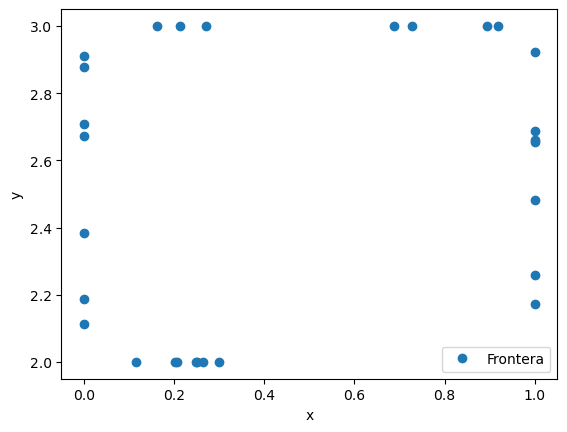

In [5]:
plt.plot(bdy[:,0], bdy[:,1], 'o', label = 'Frontera')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.savefig('bdy.png')
plt.show()

# Diferentes elecciones de los puntos interiores

In [7]:
N = 2**5

In [9]:
sobol = qmc.Sobol(d=2, scramble = True)
sobol_smp = sobol.random(N) # Es necesario que N sea una potencia de 2
sobol_smp = qmc.scale(sobol_smp, [xl, yd], [xr, yu])

In [11]:
lhs = qmc.LatinHypercube(d=2, scramble = True)
lhs_smp = lhs.random(N)
lhs_smp = qmc.scale(lhs_smp, [xl, yd], [xr, yu])

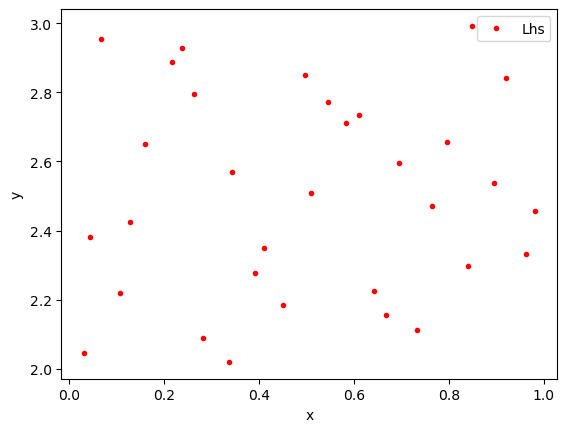

In [15]:
plt.plot(lhs_smp[:,0], lhs_smp[:,1], '.r', label = 'Lhs')
# plt.plot(sobol_smp[:,0], sobol_smp[:,1], '.g', label = 'Sobol')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.savefig('lhs.png')
plt.show()

# Elección conjunta

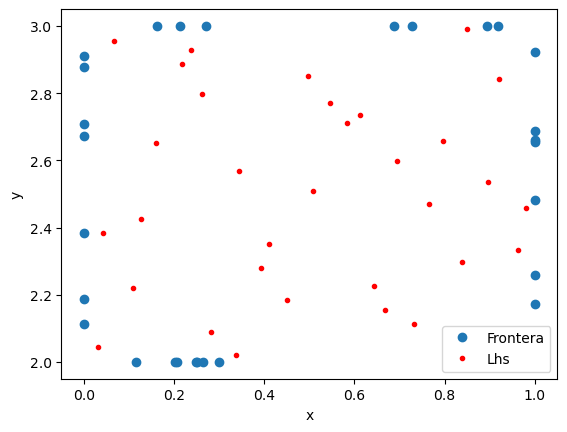

In [21]:
plt.plot(bdy[:,0], bdy[:,1], 'o', label = 'Frontera')
plt.plot(lhs_smp[:,0], lhs_smp[:,1], '.r', label = 'Lhs')
# plt.plot(sobol_smp[:,0], sobol_smp[:,1], '.g', label = 'Sobol')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.savefig('bdy_lhs.png')
plt.show()